<a href="https://colab.research.google.com/github/nelsonbjr/Covid19_Crisis/blob/master/covid19_Brasil_23APR20_Novos_Graficosv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Autor: Nelson Biagio Junior
## Data: 21 MAR 2020


## **OBTENDO DADOS E PREPARANDO O AMBIENTE**


In [0]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline




In [98]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [99]:
casos.rename(columns={'Country/Region' : 'Country'}, inplace = True)
casos.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1


## **SELECIONANDO DADOS DO BRASIL**

In [100]:
casos_BR = casos[casos.Country == "Brazil"]
casos_BR.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757


In [101]:
filtro_brasil = casos["Country"] == "Brazil"
casos.loc[filtro_brasil]

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757


In [102]:
casos_BR.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757


In [103]:
casos_BR = np.sum(casos_BR.iloc[ : , 4 : casos_BR.shape[1]]) ##Criando um índice atravez do atributo de data
casos_BR.index = pd.DatetimeIndex(casos_BR.index)
casos_BR.tail()


2020-04-18    36658
2020-04-19    38654
2020-04-20    40743
2020-04-21    43079
2020-04-22    45757
dtype: int64

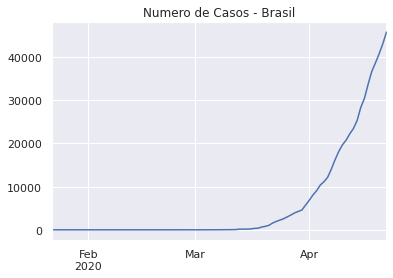

In [104]:
casos_BR.plot() ##Gráfico com o número de casos do Brasil
plt.title('Numero de Casos - Brasil')
plt.show()


## **MORTES POR COVID-19 NO BRASIL**

In [105]:
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
mortes.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
mortes.rename(columns={'Country/Region' : 'Country'}, inplace = True)
mortes.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
mortes_BR = mortes[mortes.Country == "Brazil"] ## Selecionando os óbitos no Brasil
mortes_BR.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,6,11,15,25,34,46,59,77,92,111,136,159,201,240,324,359,445,486,564,686,819,950,1057,1124,1223,1328,1532,1736,1924,2141,2354,2462,2587,2741,2906


In [108]:
##Criando um índice atravez do atributo de data
mortes_BR = np.sum(mortes_BR.iloc[ : , 4 : mortes_BR.shape[1]])
mortes_BR.index = pd.DatetimeIndex(mortes_BR.index)
mortes_BR.tail()

2020-04-18    2354
2020-04-19    2462
2020-04-20    2587
2020-04-21    2741
2020-04-22    2906
dtype: int64

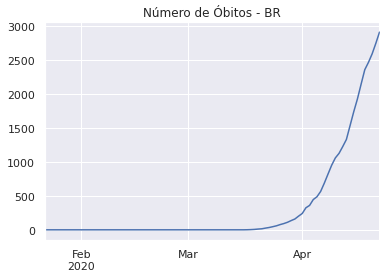

In [109]:
mortes_BR.plot() ##Gráfico com o número de mortes do Brasil
plt.title('Número de Óbitos - BR')
plt.show()

## **MORTALIDADE NO BRASIL**


In [110]:
mortalidade_BR = (mortes_BR/casos_BR)*100
mortalidade_BR.tail(20)

2020-04-03    3.964223
2020-04-04    4.295367
2020-04-05    4.366577
2020-04-06    4.637776
2020-04-07    4.888129
2020-04-08    5.064935
2020-04-09    5.250940
2020-04-10    5.382422
2020-04-11    5.422878
2020-04-12    5.510995
2020-04-13    5.667947
2020-04-14    6.064445
2020-04-15    6.129944
2020-04-16    6.323747
2020-04-17    6.356511
2020-04-18    6.421518
2020-04-19    6.369328
2020-04-20    6.349557
2020-04-21    6.362729
2020-04-22    6.350941
dtype: float64

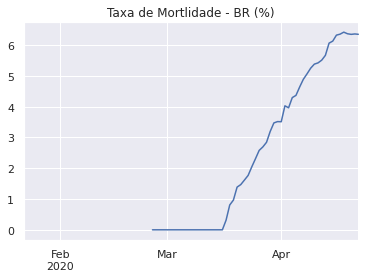

In [111]:
mortalidade_BR.plot()
plt.title('Taxa de Mortlidade - BR (%)')
plt.show()


## **DADOS DE PACIENTES RECUPERADOS NO BRASIL**

In [112]:
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recuperados.shape

(250, 96)

In [113]:
recuperados.rename(columns={'Country/Region' : 'Country'}, inplace = True)
recuperados.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
recuperados_BR = recuperados[recuperados.Country == "Brazil"]
recuperados_BR.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
29,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,2,2,2,2,2,2,2,6,6,6,6,120,127,127,127,127,127,127,127,127,127,173,173,173,173,173,3046,14026,14026,14026,14026,22130,22130,22991,25318


In [115]:
##Criando um índice atravez do atributo de data
recuperados_BR = np.sum(recuperados_BR.iloc[ : , 4 : recuperados_BR.shape[1]])
recuperados_BR.index = pd.DatetimeIndex(recuperados_BR.index)
recuperados_BR.tail()

2020-04-18    14026
2020-04-19    22130
2020-04-20    22130
2020-04-21    22991
2020-04-22    25318
dtype: int64

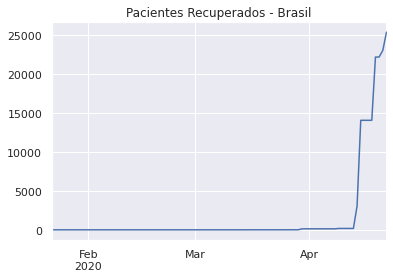

In [116]:
recuperados_BR.plot()
plt.title('Pacientes Recuperados - Brasil')
plt.show()

## **DADOS DE PACIENTES ATIVOS NO BRASIL**

In [117]:
ativos_BR = casos_BR - (recuperados_BR+mortes_BR)
ativos_BR.tail()

2020-04-18    20278
2020-04-19    14062
2020-04-20    16026
2020-04-21    17347
2020-04-22    17533
dtype: int64

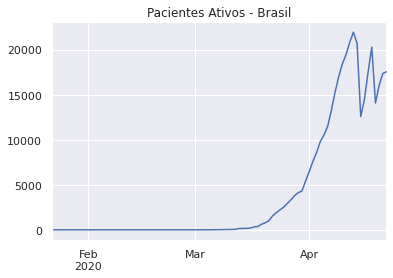

In [118]:
ativos_BR.plot()
plt.title('Pacientes Ativos - Brasil')
plt.show()

In [119]:
df = pd.concat([casos_BR, ativos_BR, recuperados_BR, mortes_BR], axis=1)
df.tail(80)

,0,1,2,3
2020-02-03,0,0,0,0
2020-02-04,0,0,0,0
2020-02-05,0,0,0,0
2020-02-06,0,0,0,0
2020-02-07,0,0,0,0
...,...,...,...,...
2020-04-18,36658,20278,14026,2354
2020-04-19,38654,14062,22130,2462
2020-04-20,40743,16026,22130,2587
2020-04-21,43079,17347,22991,2741


In [120]:
df.columns = (["casos", "ativos", "recuperados", "mortes"])
df.tail()

,casos,ativos,recuperados,mortes
2020-04-18,36658,20278,14026,2354
2020-04-19,38654,14062,22130,2462
2020-04-20,40743,16026,22130,2587
2020-04-21,43079,17347,22991,2741
2020-04-22,45757,17533,25318,2906


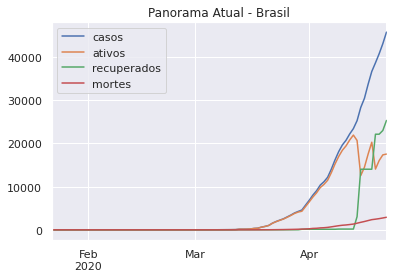

In [121]:
df.plot()
plt.title('Panorama Atual - Brasil')
plt.show()


## **CALCULANDO O NÚMERO DE NOVOS CASOS NO BRASIL**

In [122]:
## O objetivo desta análise é calcular a taxa de crescimento da Covid19 no Brasil
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

df.drop(["Province/State", "Lat", "Long"], axis=1, inplace=True)

brasil = df.loc[df["Country/Region"] == "Brazil"].copy()
brasil.reset_index(drop=True, inplace=True)

brasil_t = brasil.T
brasil_t.drop("Country/Region", inplace=True)
brasil_t.columns = ["Casos"]
brasil_t.index.name = "Data"
brasil_t.index = pd.to_datetime(brasil_t.index)
brasil_t["Novos Casos"] = brasil_t["Casos"].diff()
brasil_t.tail(40)

,Casos,Novos Casos
Data,,
2020-03-14,151,0
2020-03-15,162,11
2020-03-16,200,38
2020-03-17,321,121
2020-03-18,372,51
2020-03-19,621,249
2020-03-20,793,172
2020-03-21,1021,228
2020-03-22,1546,525


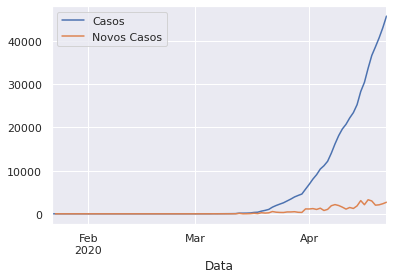

In [123]:
brasil_t.plot()

## **CALCULANDO A TAXA DE CRESCIMENTO NO BRASIL**

In [124]:
novos_casos = brasil_t["Casos"].diff()
novos_casos.tail()

Data
2020-04-18    2976
2020-04-19    1996
2020-04-20    2089
2020-04-21    2336
2020-04-22    2678
Name: Casos, dtype: object

In [125]:
df = pd.concat([casos_BR, novos_casos], axis=1)
df.tail()

,0,Casos
2020-04-18,36658,2976
2020-04-19,38654,1996
2020-04-20,40743,2089
2020-04-21,43079,2336
2020-04-22,45757,2678


In [126]:
df.columns = (["casos", "Novos Casos"])
df.tail()

,casos,Novos Casos
2020-04-18,36658,2976
2020-04-19,38654,1996
2020-04-20,40743,2089
2020-04-21,43079,2336
2020-04-22,45757,2678


In [127]:
crescimento = (novos_casos[35:]/casos_BR[35:])*100
crescimento.tail(30)


Data
2020-03-24    14.3747
2020-03-25    12.0204
2020-03-26    14.4389
2020-03-27    12.6427
2020-03-28    12.4744
2020-03-29    8.27068
2020-03-30    7.05394
2020-03-31    19.9055
2020-04-01    16.3692
2020-04-02    15.0174
2020-04-03    11.1749
2020-04-04    12.5869
2020-04-05    6.91824
2020-04-06    8.47792
2020-04-07    13.3462
2020-04-08    13.2096
2020-04-09    10.6235
2020-04-10    7.87249
2020-04-11    5.25402
2020-04-12    6.60148
2020-04-13    5.28382
2020-04-14      7.252
2020-04-15     10.798
2020-04-16    6.91865
2020-04-17    9.66985
2020-04-18    8.11828
2020-04-19    5.16376
2020-04-20    5.12726
2020-04-21     5.4226
2020-04-22    5.85266
dtype: object

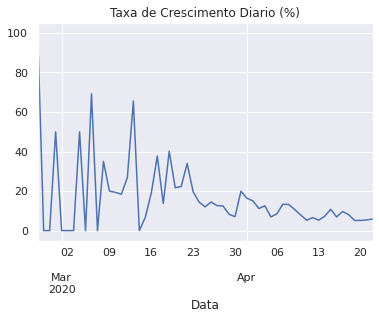

In [128]:
crescimento.plot()
plt.title('Taxa de Crescimento Diario (%)')
plt.show()


# **Nova Visualização - Estados Brasileiros**

In [129]:
# Importando dados do dataset
data = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            25944 non-null  object 
 1   state                           25944 non-null  object 
 2   city                            24886 non-null  object 
 3   place_type                      25944 non-null  object 
 4   confirmed                       25944 non-null  int64  
 5   deaths                          25944 non-null  int64  
 6   is_last                         25944 non-null  bool   
 7   estimated_population_2019       25528 non-null  float64
 8   city_ibge_code                  25528 non-null  float64
 9   confirmed_per_100k_inhabitants  25128 non-null  float64
 10  death_rate                      6092 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 2.0+ MB


In [130]:
data.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-22,AC,Acrelândia,city,12,0,True,15256.0,1200013.0,78.65758,NaN
1,2020-04-22,AC,Bujari,city,1,0,True,10266.0,1200138.0,9.74089,NaN
2,2020-04-22,AC,Cruzeiro do Sul,city,5,0,True,88376.0,1200203.0,5.65764,NaN
3,2020-04-22,AC,Plácido de Castro,city,21,1,True,19761.0,1200385.0,106.26993,0.0476
4,2020-04-22,AC,Porto Acre,city,1,0,True,18504.0,1200807.0,5.40424,NaN
5,2020-04-22,AC,Rio Branco,city,172,7,True,407319.0,1200401.0,42.22735,0.0407
6,2020-04-22,AC,Senador Guiomard,city,2,0,True,23024.0,1200450.0,8.68659,NaN
7,2020-04-22,AC,NaN,state,214,8,True,881935.0,12.0,24.26483,0.0374
8,2020-04-22,AL,Arapiraca,city,3,0,True,231747.0,2700300.0,1.29452,NaN
9,2020-04-22,AL,Boca da Mata,city,1,0,True,27281.0,2701001.0,3.66555,NaN


In [131]:
data.describe()

,confirmed,deaths,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,25944.000000,25944.000000,2.552800e+04,2.552800e+04,25128.000000,6092.000000
mean,42.437789,2.378585,5.393522e+05,3.212943e+06,10.100387,0.284106
std,391.187994,27.324947,2.773027e+06,1.142926e+06,23.585475,0.325228
min,0.000000,0.000000,1.149000e+03,1.100000e+01,0.002180,0.003400
25%,1.000000,0.000000,2.280000e+04,2.607208e+06,2.279770,0.052600
50%,2.000000,0.000000,5.738600e+04,3.302700e+06,4.964500,0.133300
75%,6.000000,0.000000,1.611270e+05,4.123402e+06,10.739700,0.400000
max,15914.000000,1134.000000,4.591905e+07,5.300108e+06,947.402810,1.000000


**Manipulando Dados**

In [132]:
# Dados por estado
data_states = data[data.place_type.eq('state')]
data_states.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
7,2020-04-22,AC,NaN,state,214,8,True,881935.0,12.0,24.26483,0.0374
25,2020-04-22,AL,NaN,state,243,20,True,3337357.0,27.0,7.28121,0.0823
60,2020-04-22,AM,NaN,state,2479,206,True,4144597.0,13.0,59.81281,0.0831
69,2020-04-22,AP,NaN,state,492,14,True,845731.0,16.0,58.17453,0.0285
179,2020-04-22,BA,NaN,state,1645,53,True,14873064.0,29.0,11.06026,0.0322
182,2020-04-22,DF,NaN,state,959,25,True,3015268.0,53.0,31.80480,0.0261
227,2020-04-22,ES,NaN,state,1351,37,True,4018650.0,32.0,33.61825,0.0274
278,2020-04-22,GO,NaN,state,438,21,True,7018354.0,52.0,6.24078,0.0479
326,2020-04-22,MA,NaN,state,1757,76,True,7075181.0,21.0,24.83329,0.0433
471,2020-04-22,MG,NaN,state,1283,47,True,21168791.0,31.0,6.06081,0.0366


In [133]:
# Segregar dados de casos confirmados e mortes
data_states_confirmed = data_states[['date','state','confirmed']]
data_states_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 7 to 25943
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1058 non-null   object
 1   state      1058 non-null   object
 2   confirmed  1058 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.1+ KB


In [134]:
data_states_deaths = data_states[['date','state','deaths']]
data_states_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 7 to 25943
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1058 non-null   object
 1   state   1058 non-null   object
 2   deaths  1058 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.1+ KB


In [135]:
# Tabela de população de cada estado em 2019

states_pop = data_states[['state','estimated_population_2019']]
states_pop = states_pop.drop_duplicates()
states_pop.set_index('state', inplace = True)
states_pop

,estimated_population_2019
state,
AC,881935.0
AL,3337357.0
AM,4144597.0
AP,845731.0
BA,14873064.0
DF,3015268.0
ES,4018650.0
GO,7018354.0
MA,7075181.0


## **Numero de Casos Confirmados**
## **Transformação de dados**

In [136]:
# Transformar dataframe de long para wide
data_cases = data_states_confirmed.pivot(index='state', columns='date', values='confirmed')
data_cases.head()

date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,4.0,7.0,11.0,11.0,17.0,21.0,23.0,23.0,25.0,25.0,34.0,41.0,42.0,43.0,45.0,46.0,46.0,48.0,50.0,50.0,58.0,62.0,70.0,72.0,77.0,90.0,99.0,101.0,115.0,135.0,142.0,163.0,176.0,195.0,214.0
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,4.0,6.0,7.0,7.0,8.0,10.0,11.0,11.0,12.0,14.0,17.0,17.0,18.0,18.0,18.0,23.0,23.0,28.0,31.0,34.0,37.0,37.0,45.0,48.0,48.0,58.0,72.0,83.0,89.0,110.0,132.0,159.0,171.0,210.0,243.0
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,3.0,7.0,11.0,26.0,32.0,47.0,54.0,67.0,81.0,111.0,140.0,151.0,175.0,200.0,229.0,260.0,311.0,417.0,532.0,636.0,804.0,899.0,981.0,1049.0,1206.0,1275.0,1484.0,1554.0,1719.0,1809.0,1897.0,2044.0,2160.0,2270.0,2479.0
AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,8.0,8.0,10.0,11.0,12.0,19.0,29.0,32.0,39.0,51.0,107.0,110.0,166.0,193.0,237.0,244.0,308.0,342.0,362.0,375.0,400.0,416.0,435.0,466.0,492.0
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,2.0,3.0,3.0,7.0,NaN,9.0,10.0,14.0,27.0,31.0,34.0,41.0,55.0,63.0,79.0,91.0,108.0,123.0,127.0,156.0,176.0,217.0,246.0,267.0,290.0,336.0,401.0,437.0,462.0,515.0,568.0,616.0,640.0,674.0,723.0,776.0,884.0,967.0,1064.0,1200.0,1249.0,1377.0,1504.0,1645.0


In [137]:
# Verificar index das observaçôes
data_cases.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='state')

In [138]:
# Trocando a indexação de estado por data
data_cases = data_cases.transpose()
data_cases

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [139]:
# Verificar a indexação como data
data_cases.index

Index(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22'],
      dtype='object', name='date')

In [140]:
# Conversão do index para DateTimeIndex pois está como 'object'
datetime_index = pd.DatetimeIndex(data_cases.index)
data_cases.set_index(datetime_index, inplace = True)
# Verificar o index novamente
data_cases.index

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
      

In [141]:
# Existem NAs entre observações válidas, provavlemente houve um falta de informação para aquele estado naquele dia. Vamos considerar este valor igual ao último valor válido para aquele estado.
data_cases.fillna(method='ffill', inplace=True)
data_cases

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


**Visualização de Dados**

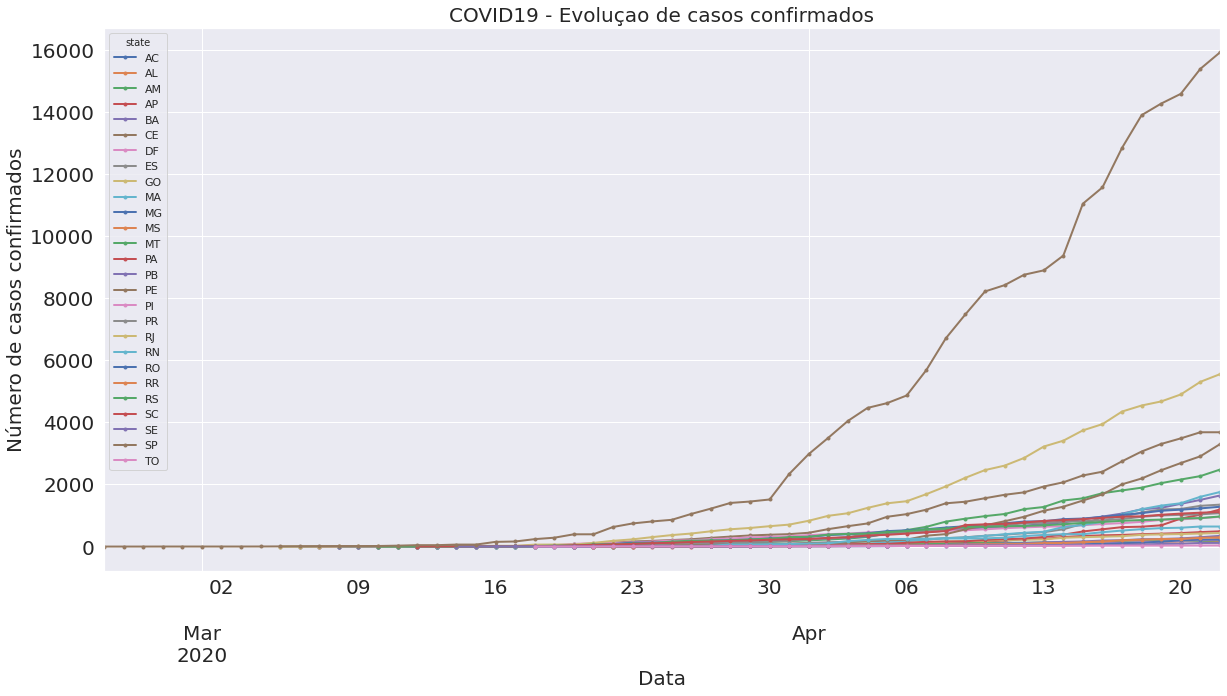

In [142]:
# Visualizar número totais de caasos por estado
data_cases.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de casos confirmados', fontsize=20);
plt.title('COVID19 - Evoluçao de casos confirmados', fontsize=20);

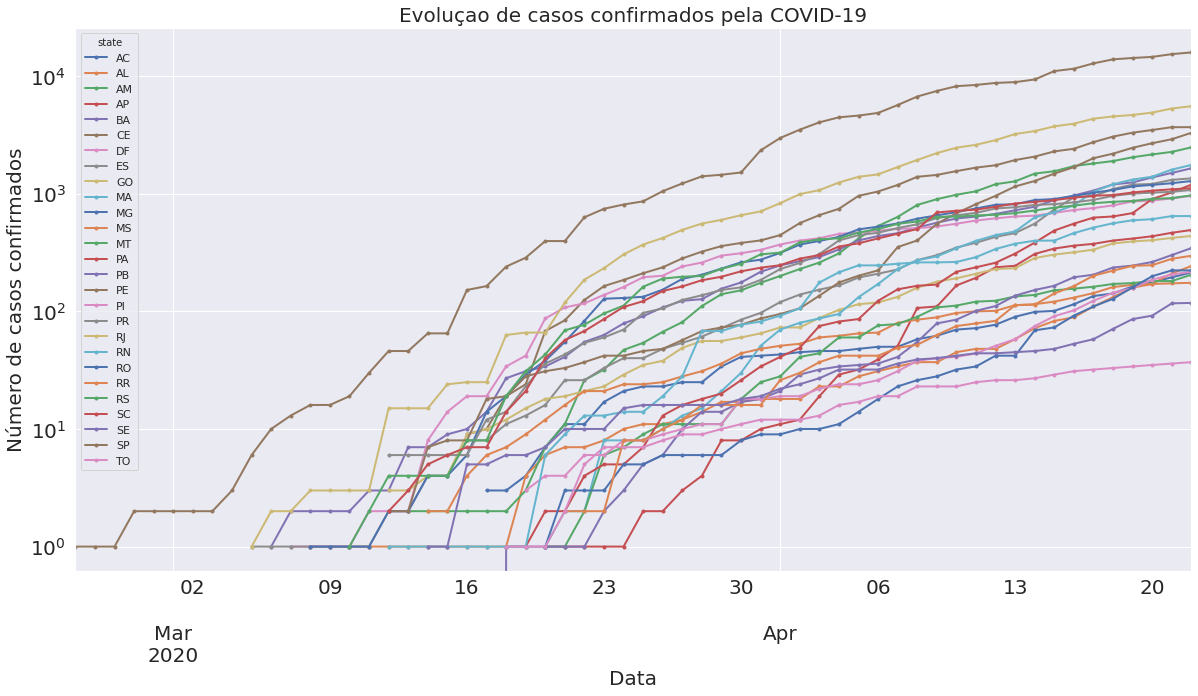

In [143]:
# Visualizar número totais de casos por estado na escala semi-logarítmica
data_cases.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de casos confirmados', fontsize=20);
plt.title('Evoluçao de casos confirmados pela COVID-19', fontsize=20);

# **Visualização de dados alinhando o primeiro dia com 5 casos**

In [144]:
# Iterar sobre as colunas e valores < 5 serão nulos
for col in data_cases.columns:
    data_cases.loc[(data_cases[col] < 5), col] = None

# Check out tail
data_cases.tail()

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-18,142.0,132.0,1897.0,400.0,1200.0,3062.0,796.0,1099.0,378.0,1205.0,1077.0,161.0,171.0,641.0,236.0,2193.0,144.0,960.0,4543.0,561.0,128.0,222.0,854.0,975.0,71.0,13894.0,33.0
2020-04-19,163.0,159.0,2044.0,416.0,1249.0,3306.0,860.0,1195.0,393.0,1320.0,1154.0,168.0,174.0,685.0,245.0,2459.0,158.0,1002.0,4675.0,595.0,160.0,244.0,869.0,1025.0,86.0,14267.0,34.0
2020-04-20,176.0,171.0,2160.0,435.0,1377.0,3485.0,875.0,1212.0,403.0,1396.0,1189.0,171.0,181.0,902.0,263.0,2690.0,186.0,1022.0,4899.0,608.0,199.0,247.0,904.0,1063.0,92.0,14580.0,35.0
2020-04-21,195.0,210.0,2270.0,466.0,1504.0,3682.0,913.0,1313.0,421.0,1604.0,1230.0,173.0,181.0,1026.0,301.0,2908.0,206.0,1039.0,5306.0,646.0,223.0,280.0,918.0,1091.0,117.0,15385.0,36.0
2020-04-22,214.0,243.0,2479.0,492.0,1645.0,3682.0,959.0,1351.0,438.0,1757.0,1283.0,175.0,205.0,1195.0,345.0,3298.0,217.0,1077.0,5552.0,646.0,223.0,297.0,970.0,1115.0,118.0,15914.0,37.0


In [145]:
# Retirar colunas que tenham tudo NaNs (estados que ainda não chegaram a 5 casos)
data_cases.dropna(axis = 1, how = "all", inplace = True)
data_cases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2020-02-25 to 2020-04-22
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      34 non-null     float64
 1   AL      34 non-null     float64
 2   AM      34 non-null     float64
 3   AP      25 non-null     float64
 4   BA      41 non-null     float64
 5   CE      38 non-null     float64
 6   DF      40 non-null     float64
 7   ES      38 non-null     float64
 8   GO      38 non-null     float64
 9   MA      31 non-null     float64
 10  MG      38 non-null     float64
 11  MS      37 non-null     float64
 12  MT      31 non-null     float64
 13  PA      31 non-null     float64
 14  PB      29 non-null     float64
 15  PE      40 non-null     float64
 16  PI      32 non-null     float64
 17  PR      42 non-null     float64
 18  RJ      42 non-null     float64
 19  RN      34 non-null     float64
 20  RO      30 non-null     float64
 21  RR      30 non-null  

In [146]:
# Criar dataframe com a data do primeiro dia com o 5o caso em cada estado
date_5th_cases = data_cases.apply(pd.Series.first_valid_index)
df_5th_cases = pd.DataFrame(date_5th_cases)
df_5th_cases

,0
state,
AC,2020-03-20
AL,2020-03-20
AM,2020-03-20
AP,2020-03-29
BA,2020-03-13
CE,2020-03-16
DF,2020-03-14
ES,2020-03-16
GO,2020-03-16


In [147]:
# Resetar o index, retirar a coluna de data
data_cases_drop = data_cases.reset_index().drop(['date'], axis = 1)
data_cases_drop.head()

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Trazer para cima os dados a partir do primeiro dado válido (shift)
for col in data_cases_drop.columns:
    data_cases_drop[col] = data_cases_drop[col].shift(-data_cases_drop[col].first_valid_index())
# check out head
data_cases_drop

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,7.0,6.0,7.0,8.0,7.0,9.0,8.0,8.0,9.0,8.0,6.0,6.0,6.0,5.0,5.0,7.0,6.0,6.0,15.0,6.0,5.0,8.0,8.0,5.0,5.0,6.0,5.0
1,11.0,7.0,11.0,8.0,7.0,10.0,14.0,8.0,10.0,8.0,14.0,7.0,7.0,5.0,6.0,8.0,6.0,6.0,15.0,9.0,5.0,8.0,8.0,6.0,5.0,10.0,7.0
2,11.0,7.0,26.0,10.0,9.0,19.0,19.0,11.0,12.0,8.0,19.0,9.0,9.0,7.0,10.0,8.0,8.0,6.0,15.0,13.0,6.0,10.0,19.0,7.0,6.0,13.0,7.0
3,17.0,8.0,32.0,11.0,10.0,24.0,19.0,13.0,15.0,10.0,29.0,12.0,11.0,13.0,14.0,18.0,8.0,6.0,24.0,13.0,6.0,12.0,31.0,7.0,6.0,16.0,7.0
4,21.0,10.0,47.0,12.0,14.0,68.0,34.0,16.0,18.0,13.0,38.0,16.0,11.0,16.0,14.0,19.0,9.0,6.0,25.0,14.0,6.0,16.0,43.0,14.0,7.0,16.0,8.0
5,23.0,11.0,54.0,19.0,27.0,84.0,42.0,26.0,19.0,15.0,55.0,21.0,11.0,18.0,17.0,28.0,10.0,12.0,25.0,14.0,6.0,16.0,69.0,21.0,10.0,19.0,9.0
6,23.0,11.0,67.0,29.0,31.0,125.0,87.0,26.0,21.0,21.0,83.0,21.0,11.0,20.0,18.0,31.0,11.0,14.0,63.0,19.0,8.0,16.0,77.0,40.0,10.0,30.0,9.0
7,25.0,12.0,81.0,32.0,34.0,164.0,108.0,33.0,23.0,30.0,128.0,24.0,18.0,26.0,21.0,33.0,11.0,23.0,66.0,28.0,9.0,16.0,96.0,57.0,10.0,46.0,10.0
8,25.0,14.0,111.0,39.0,41.0,185.0,117.0,40.0,29.0,51.0,130.0,24.0,25.0,34.0,29.0,37.0,18.0,36.0,66.0,68.0,9.0,26.0,112.0,68.0,15.0,46.0,11.0
9,34.0,17.0,140.0,51.0,55.0,211.0,138.0,40.0,35.0,70.0,133.0,25.0,28.0,41.0,32.0,42.0,18.0,43.0,119.0,68.0,10.0,30.0,162.0,86.0,16.0,65.0,12.0


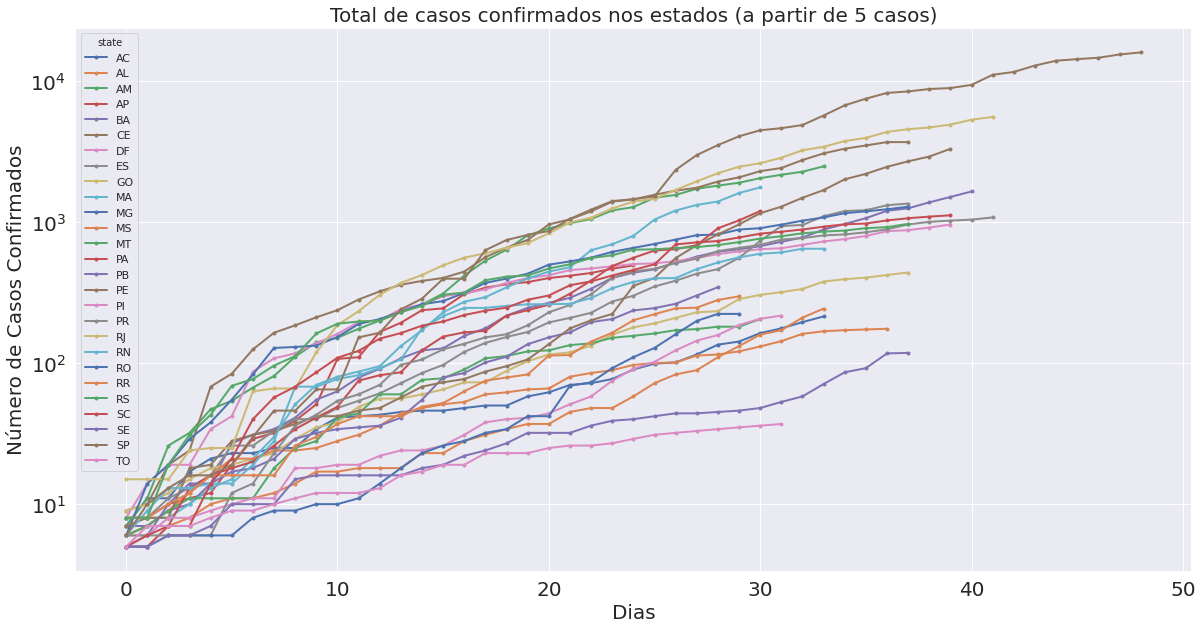

In [151]:
# Evolução na escala semi-logarítimica 
data_cases_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Dias', fontsize=20);
plt.ylabel('Número de Casos Confirmados', fontsize=20);
plt.title('Total de casos confirmados nos estados (a partir de 5 casos)', fontsize=20);

# **Visualização interativa com Altair**

In [152]:
# Transformar dados em long para utilizar no altair
# Endereço da Biblioteca: https://matthewkudija.com/blog/2018/06/22/altair-interactive/
cases_long = data_cases_drop.reset_index().melt(id_vars = 'index', value_name = 'confirmed').rename(columns={'index':'Day'})
cases_long

,Day,state,confirmed
0,0,AC,7.0
1,1,AC,11.0
2,2,AC,11.0
3,3,AC,17.0
4,4,AC,21.0
...,...,...,...
1561,53,TO,NaN
1562,54,TO,NaN
1563,55,TO,NaN
1564,56,TO,NaN


In [153]:
# Adicionar primeiro dia da 5a morte por estado
cases_long = cases_long.merge(df_5th_cases, left_on='state', right_index=True, how='left')
cases_long

,Day,state,confirmed,0
0,0,AC,7.0,2020-03-20
1,1,AC,11.0,2020-03-20
2,2,AC,11.0,2020-03-20
3,3,AC,17.0,2020-03-20
4,4,AC,21.0,2020-03-20
...,...,...,...,...
1561,53,TO,NaN,2020-03-22
1562,54,TO,NaN,2020-03-22
1563,55,TO,NaN,2020-03-22
1564,56,TO,NaN,2020-03-22


In [154]:
# Adicionar coluna com a data de cada observação
from datetime import datetime  
from datetime import timedelta 
cases_long['Date'] = cases_long.iloc[:,3] + cases_long['Day'].map(timedelta)
cases_long

,Day,state,confirmed,0,Date
0,0,AC,7.0,2020-03-20,2020-03-20
1,1,AC,11.0,2020-03-20,2020-03-21
2,2,AC,11.0,2020-03-20,2020-03-22
3,3,AC,17.0,2020-03-20,2020-03-23
4,4,AC,21.0,2020-03-20,2020-03-24
...,...,...,...,...,...
1561,53,TO,NaN,2020-03-22,2020-05-14
1562,54,TO,NaN,2020-03-22,2020-05-15
1563,55,TO,NaN,2020-03-22,2020-05-16
1564,56,TO,NaN,2020-03-22,2020-05-17


In [155]:
# Remover coluna com primeiro dia da 5a morte
cases_long = cases_long.drop([cases_long.columns[3]] ,  axis='columns')
cases_long

,Day,state,confirmed,Date
0,0,AC,7.0,2020-03-20
1,1,AC,11.0,2020-03-21
2,2,AC,11.0,2020-03-22
3,3,AC,17.0,2020-03-23
4,4,AC,21.0,2020-03-24
...,...,...,...,...
1561,53,TO,NaN,2020-05-14
1562,54,TO,NaN,2020-05-15
1563,55,TO,NaN,2020-05-16
1564,56,TO,NaN,2020-05-17


In [156]:
# Adicionar população por estado
cases_long = cases_long.merge(states_pop, left_on='state', right_index=True, how='left')
cases_long.head()

,Day,state,confirmed,Date,estimated_population_2019
0,0,AC,7.0,2020-03-20,881935.0
1,1,AC,11.0,2020-03-21,881935.0
2,2,AC,11.0,2020-03-22,881935.0
3,3,AC,17.0,2020-03-23,881935.0
4,4,AC,21.0,2020-03-24,881935.0


In [157]:
# Adicionar taxa de casos a cada 100.000 habitantes
cases_long['CasesPop'] = cases_long['confirmed']/cases_long['estimated_population_2019']*100000
cases_long.head()

,Day,state,confirmed,Date,estimated_population_2019,CasesPop
0,0,AC,7.0,2020-03-20,881935.0,0.793709
1,1,AC,11.0,2020-03-21,881935.0,1.247257
2,2,AC,11.0,2020-03-22,881935.0,1.247257
3,3,AC,17.0,2020-03-23,881935.0,1.927580
4,4,AC,21.0,2020-03-24,881935.0,2.381128


In [158]:
# drop NaNs
cases_long = cases_long.dropna()
cases_long

,Day,state,confirmed,Date,estimated_population_2019,CasesPop
0,0,AC,7.0,2020-03-20,881935.0,0.793709
1,1,AC,11.0,2020-03-21,881935.0,1.247257
2,2,AC,11.0,2020-03-22,881935.0,1.247257
3,3,AC,17.0,2020-03-23,881935.0,1.927580
4,4,AC,21.0,2020-03-24,881935.0,2.381128
...,...,...,...,...,...,...
1535,27,TO,33.0,2020-04-18,1572866.0,2.098081
1536,28,TO,34.0,2020-04-19,1572866.0,2.161659
1537,29,TO,35.0,2020-04-20,1572866.0,2.225237
1538,30,TO,36.0,2020-04-21,1572866.0,2.288815


In [164]:
import altair as alt

# Selection tool
selection = alt.selection_single(fields=['state'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('state:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(cases_long, title="COVID19 - Total de casos confirmados por estado brasileiro").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('confirmed', scale=alt.Scale(type='log')),
    color=alt.Color('state', legend=None),
).properties(
    width=650,
    height=800
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=['state:N', 'yearmonthdate(Date):N', 'confirmed:N']
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir do 5o. caso no estado')),
    y=alt.Y('confirmed', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Casos confirmados (escala logarítmica)')),
    text='state'
).transform_filter(
    selection
)

# Add doubling line

## Death doubles every 2 days
j = 0
for i in range(0,cases_long.Day.max()):
    if 5*pow(2,(i/2)) < cases_long.confirmed.max():
      j = i+2

source2 = alt.sequence(start=0, stop=j, step=1, as_='x')

double2 = alt.Chart(source2).mark_line(strokeDash=[2,2]).transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 13, 'y': 500}]}).mark_text(
    text='casos duplicam a cada 2 dias', angle=305,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Cases doubles every 5 days
j = 0
for i in range(0,cases_long.Day.max()):
    if 5*pow(2,(i/5)) < cases_long.confirmed.max():
      j = i+2

source5 = alt.sequence(start=0, stop=j, step=1, as_='x')

double5 = alt.Chart(source5).mark_line(strokeDash=[2,2]).transform_calculate(
    double5='5*pow(2,(datum.x/5))'
).transform_fold(
    ['double5']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text5 = alt.Chart({'values':[{'x': 24, 'y': 150}]}).mark_text(
    text='a cada 5 dias', angle=329,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Cases doubles every 10 days
j = 0
for i in range(0,cases_long.Day.max()):
    if 5*pow(2,(i/10)) < cases_long.confirmed.max():
      j = i+2

source10 = alt.sequence(start=0, stop=j, step=1, as_='x')

double10 = alt.Chart(source10).mark_line(strokeDash=[2,2]).transform_calculate(
    double10='5*pow(2,(datum.x/10))'
).transform_fold(
    ['double10']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text10 = alt.Chart({'values':[{'x': 24, 'y': 28}]}).mark_text(
    text='a cada 10 dias', angle=343,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

# Sum it all up
alt.layer(chart, overlay, text, double2, double5, double10, text2, text5, text10).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
)


# Sum em up!
#chart + overlay + text

alt.LayerChart(...)

In [165]:
# Mortes por habitantes

# Base altair plot 
basepop = alt.Chart(cases_long, title="COVID19 - Casos confirmados a cada 100 mil habitantes").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('confirmed'),
    color=alt.Color('state', legend=None),
).properties(
    width=650,
    height=800
)

# Chart
chartpop = basepop.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=['state:N', 'yearmonthdate(Date):N', 'confirmed:N']
).add_selection(
  selection
)

# Overlay
overlaypop = basepop.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
textpop = basepop.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir do 5. caso no estado')),
    y=alt.Y('confirmed', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Casos confirmados a cada 100 mil habitantes')),
    text='state'
).transform_filter(
    selection
)

# Sum em up!
alt.layer(chartpop + overlaypop + textpop).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
)

alt.LayerChart(...)